In [91]:
import pandas as pd
import glob
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt
import seaborn as sns

In [77]:
def read_csv_list(path, file_type, extension ='csv'):
    """ Reads a list of files (.CSV) and returns a combined pandas DataFrame
    """
    years = range(2010,2018)
    csvs = [pd.read_csv(path+'/'+str(year)+'/'+file_type+'.'+extension) for year in years]
    combined_df = pd.concat(csvs, sort=False)
    return combined_df

In [81]:
data_path = '../clean_data/'
accidents = read_csv_list(data_path, file_type = 'accidents')

In [75]:
accidents.columns

Index(['Codi barri', 'Codi carrer', 'Codi districte', 'Coordenada UTM (X)',
       'Coordenada UTM (Y)', 'Descripció causa vianant',
       'Descripció dia setmana', 'Descripció tipus accident',
       'Descripció tipus dia', 'Descripció torn', 'Dia de mes', 'Dia setmana',
       'Hora de dia', 'Mes de any', 'NK Any', 'Nom barri', 'Nom carrer',
       'Nom districte', 'Nom mes', 'Num postal caption', 'Número d'expedient',
       'Número de lesionats greus', 'Número de lesionats lleus',
       'Número de morts', 'Número de vehicles implicats',
       'Número de víctimes'],
      dtype='object')

In [84]:
vehicles = read_csv_list(data_path, file_type='vehicles')
vehicles.columns

Index(['Número d'expedient', 'Descripció tipus de vehicle', 'Descripció model',
       'Descripció marca', 'Descripció color', 'Descripció carnet',
       'Antiguitat carnet'],
      dtype='object')

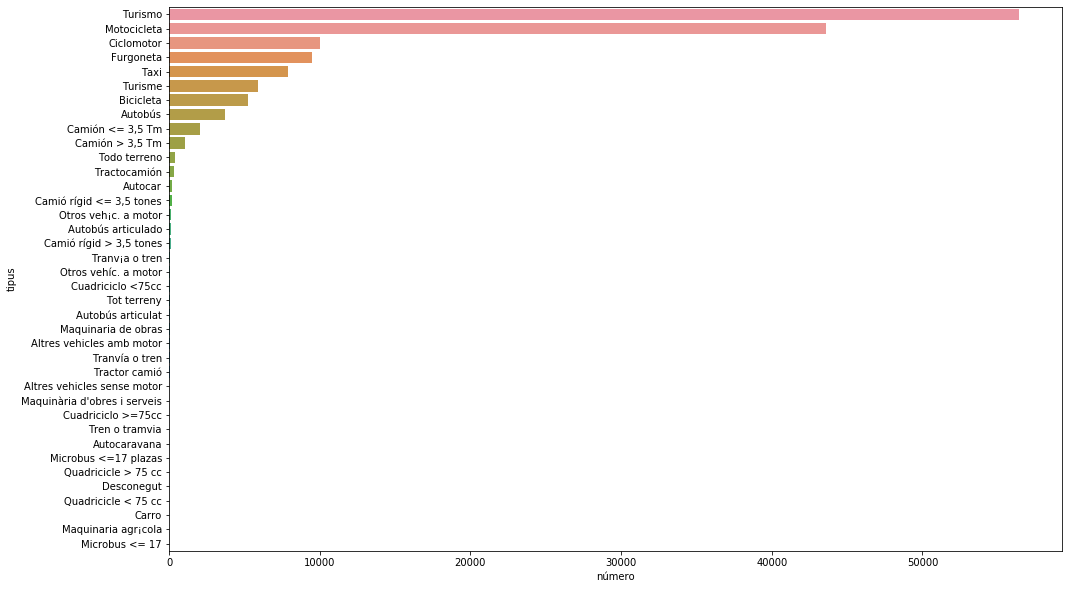

In [131]:
typeofvehicle = vehicles['Descripció tipus de vehicle']
counts = typeofvehicle.value_counts()
types_df = counts.to_frame()
types_df = types_df.reset_index()
types_df = types_df.rename(columns={'index':'tipus', 'Descripció tipus de vehicle':'número'})
plt.figure(figsize=(16, 10))
sns.barplot(y='tipus', x='número', data= types_df)
#TODO: Turismo = Turisme
#TODO: bar plot per <antiguitat vehicle, marca, tipus vehicle, color vehicle, anys carnet, tipus carnet, edat, nombre accidents>